# From Statistical Physics to Data-Driven Modelling with Applications to Quantitative Biology

Tutorial 7: Learning a Perceptron for the Prediction of binding between PDZ proteins and peptides

Data are taken from the Work: 

Michael A. Stiffler, Jiunn R. Chen, Viara P. Grantcharova, Ying Lei, Daniel Fuchs, John E. Allen, Lioudmila A. Zaslavskaia, Gavin MacBeath, PDZ Domain Binding Selectivity Is Optimized Across the Mouse Proteome. Science 317, 364 (2007)


Solution Notebook SC RM FZ.

In [3]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline
#plt.rcParams["font.family"] = "serif"
#plt.rcParams["mathtext.fontset"] = "dejavuserif"
#plt.rcParams["figure.figsize"] = (10, 8)
#plt.rcParams["font.size"] = 26

from scipy.sparse import coo_matrix
import numpy.matlib
import numpy.linalg as LA
from numpy.linalg import inv

In [4]:
# Function to convert the amino acids letters into integer numbers from 0 to 20
def letter2number(a): 
    
    switcher = {
        '-': 0,
        'A': 1,
        'C': 2,
        'D':3,
        'E':4,
        'F':5,
        'G':6,
        'H':7,
        'I':8,
        'K':9,
        'L':10,
        'M':11,
        'N':12,
        'P':13,
        'Q':14,
        'R':15,
        'S':16,
        'T':17,
        'V':18,
        'W':19,
        'Y':20,     
    }
    #return switcher.get(a, "nothing")
    return switcher.get(a,0)

def seq2number(a):
    ris = []
    for i in range(len(a)):
        ris.append(letter2number(a[i]))
    return ris

Read the PDZ-peptides interaction matrix

In [5]:
int_matrix = pd.read_excel('../Data/fp_interaction_matrix.xlsx', index_col=0)
PDZ = np.array(int_matrix.index)
NPDZ=len(PDZ)
print(NPDZ)

74


In [6]:
int_matrix

,AcvR1,AcvR2,AcvR2b,AN2,APC,Aquaporin4,ASIC2,AXL,Cacna1a,Caspr2,...,TRPM6,TRPM7,TRPM8,TRPP2,TRPV3,TRPV4,TRPV6,TYRO3,VEGFR2,VEGFR3
Cipp (03/10),0,0.00000,-1.00000,-1.00000,-1,-1.00000,-1,-1,-1.00000,4162.31648,...,-1.00000,-1.00000,-1,-1,-1.00000,-1,-1,-1,-1,-1
Cipp (05/10),0,0.00000,0.00000,0.00000,0,0.00000,0,0,0.00000,0.00000,...,0.00000,0.00000,0,0,0.00000,0,-1,0,0,0
Cipp (08/10),0,0.00000,0.00000,0.00000,-1,-1.00000,0,0,0.00000,0.00000,...,0.00000,0.00000,0,0,0.00000,0,0,0,0,0
Cipp (09/10),0,0.00000,0.00000,-1.00000,0,-1.00000,0,0,0.00000,0.00000,...,0.00000,0.00000,0,0,0.00000,0,0,-1,0,0
Cipp (10/10),0,0.00000,0.00000,0.00000,-1,0.00000,0,-1,0.00000,0.00000,...,0.00000,0.00000,0,-1,0.00000,0,0,0,0,0
D930005D10Rik (1/1),0,0.00000,0.00000,0.00000,0,0.00000,0,0,0.00000,0.00000,...,0.00000,0.00000,0,0,0.00000,0,0,0,0,0
Dlgh3 (1/1),0,0.00000,0.00000,0.00000,0,0.00000,0,0,0.00000,8186.37689,...,0.00000,0.00000,0,0,0.00000,0,0,0,0,0
Dvl1 (1/1),0,0.00000,0.00000,0.00000,0,0.00000,0,0,0.00000,0.00000,...,0.00000,0.00000,0,0,0.00000,0,0,0,0,0
Dvl2 (1/1),0,0.00000,0.00000,0.00000,0,0.00000,0,0,0.00000,0.00000,...,0.00000,0.00000,0,0,0.00000,0,0,0,0,0
Dvl3 (1/1),0,0.00000,0.00000,0.00000,-1,0.00000,0,-1,0.00000,0.00000,...,0.00000,0.00000,0,-1,0.00000,0,0,0,0,0


Read the sequences of the Peptides

In [19]:
# ATTENTION: the peptides in peptides.free are not in the same order as in the interaction matrix
pep = []
with open('../Data/peptides.free') as f:
    for line in f:
        x = line.split()
        pep.append(x)
Npep=len(pep)
print(Npep)
# check that all the peptides are correctly listed in pep
for i in range(Npep):
    if len(np.extract(int_matrix.columns==pep[i][0],int_matrix.columns))==0 :
        print(pep[i])

217


In [8]:
# Check that the binding is read correctly
i=11
j=6
#print('PDZ: ',PDZ[i],'\nPeptide: ',pep[j][0],'with sequence',pep[j][1],
#      '\nInteraction:',int_matrix.get_value(PDZ[i],pep[j][0]))
print('PDZ: ',PDZ[i],'\nPeptide: ',pep[j][0],'with sequence',pep[j][1],
      '\nInteraction:',int_matrix.at[PDZ[i],pep[j][0]])    

PDZ:  Gm1582 (2/3) 
Peptide:  Cftr with sequence TEEEVQETRL 
Interaction: 47845.88612


In [20]:
# Construct the matrix of peptide sequences
tmp = []
for i in range(Npep):
    tmp.append(seq2number(pep[i][1][:]))
pep_seq=np.asarray(tmp)
print(np.shape(pep_seq))
Nbase=np.shape(pep_seq)[1]

(217, 10)


In [21]:
#Expand the matrix of peptide sequences in a bynary (Npep,19x10) array X by a one-hot encoding
#gauge: last a.a. remove the last symbol
#add a last line of all one to have a constant term in dot(X,J)
q=20
#X=-np.ones((Npep,Nbase*(q-1)+1))    ### USE {-1,1} CONVENTION FOR INPUT
X=np.zeros((Npep,Nbase*(q-1)+1))     ### USE {0,1} CONVENTION FOR INPUT
for m in range(Npep):
    X[m,Nbase*(q-1)]=1
    for i in range(Nbase):
        if (pep_seq[m,i]!=q):
            X[m,i*(q-1)+pep_seq[m,i]-1]=1
print(np.shape(X))

(217, 191)


In [22]:
#Get for a given PDZ the  vector of binding/nonbinding for each peptide Y
def getY(iPDZ):
    Y = -np.ones(Npep)
    for j in range(Npep):
        #Kd=int_matrix.get_value(PDZ[iPDZ],pep[j][0])
        Kd=int_matrix.at[PDZ[iPDZ],pep[j][0]]
        if (Kd>0 and Kd<100000):
            Y[j]=1
    return Y

In [23]:
# Check how many peptides are binding to each PDZ
binding=[]
for j in range(NPDZ):
    Y=getY(j)
    binding.append(sum(Y>0))
print(binding)

[2, 5, 10, 8, 3, 2, 1, 3, 2, 4, 2, 16, 5, 1, 6, 2, 41, 29, 5, 3, 3, 19, 4, 3, 2, 1, 12, 2, 13, 1, 25, 2, 1, 4, 8, 2, 1, 5, 3, 4, 3, 1, 3, 2, 1, 11, 7, 20, 2, 1, 14, 11, 20, 13, 13, 9, 5, 3, 21, 7, 17, 18, 3, 6, 15, 4, 1, 1, 6, 1, 20, 1, 13, 1]


Question 1:  Implement the perceptron learning algorithm , using a large positive value for the classification condition: c = 1000.

In [26]:
# Perceptron algorithm -- here eta is the matrix eta_mu = y_mu X_mu
def perceptron_alg(eta):
    Np=np.shape(eta)[1]
    J=np.zeros(Np)
    c=1000
    ct=0
    stab=[]
    niter=0
    while(ct<c and niter<1000000):
        muV=np.dot(eta,J)
        mut=np.argmin(muV)
        ct=muV[mut]
        if (niter>0):
            stab.append(ct/np.linalg.norm(J))
        J = J + eta[mut,:]
        niter += 1
    return J/np.linalg.norm(J), stab, niter

#set of binding/non-binding peptides for each PDZ
def myset (a,n):
    return set(np.array(np.where(a==n)).flatten())

Question 2: Choose  PDZ 11 and split the data in training (containing 150 sequences) and test set (containing 67 sequences)

In [34]:
# Choose one PDZ and split the data in training and test set -- without using sklearn
myPDZ=11
y=getY(myPDZ)
print("PDZ: ", PDZ[myPDZ])
print("Total sample:",Npep,' of which binding: ',sum(y>0))

Msplit=150
yTrain = y[0:Msplit]
yTest = y[Msplit:]
XTrain = X[0:Msplit,:]
XTest = X[Msplit:,:]

print("Training Samples: ", len(yTrain), " of which binding:",sum(yTrain>0))
print("Testing  Samples: ", len(yTest)," of which binding:",sum(yTest>0))



PDZ:  Gm1582 (2/3)
Total sample: 217  of which binding:  16
Training Samples:  150  of which binding: 13
Testing  Samples:  67  of which binding: 3


In [33]:
# Choose one PDZ and split the data in training set  and test set -- using sklearn (random splitting)
myPDZ=11
y=getY(myPDZ)
print("PDZ: ", PDZ[myPDZ])
print("Total sample:",Npep,' of which binding: ',sum(y>0))

#--- Split Dataset ---#
from sklearn.model_selection import train_test_split
XTrain, XTest, yTrain, yTest = train_test_split(X,y,test_size = 67./217.)

print("Training Samples: ", len(yTrain), " of which binding:",sum(yTrain>0))
print("Testing  Samples: ", len(yTest)," of which binding:",sum(yTest>0))


PDZ:  Gm1582 (2/3)
Total sample: 217  of which binding:  16
Training Samples:  150  of which binding: 8
Testing  Samples:  67  of which binding: 8


Question 2: Plot the normalised stability parameter as a function of the iteration parameter

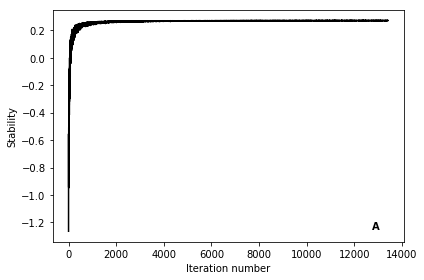

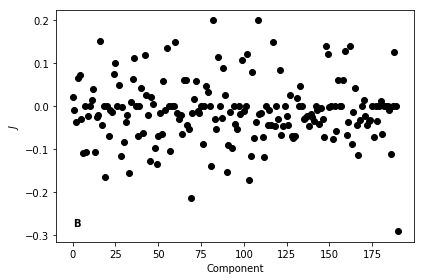

13419


In [35]:
# Run the perceptron algorithm
#eta=(XTrain.T*yTrain).T/np.sqrt(np.shape(X)[1])    ### NORMALISED ETA
eta=(XTrain.T*yTrain).T                             ### NON-NORMALISED ETA
J, stab, niter = perceptron_alg(eta)
#print(J)
plt.plot(stab,'k-')
plt.xlabel("Iteration number")
plt.ylabel("Stability")
plt.text(12750, -1.25, 'A', fontweight='bold')
plt.tight_layout()
plt.savefig('stability.pdf')
plt.show()
plt.plot(J,"ko")
plt.xlabel("Component")
plt.ylabel("$J$")
plt.text(0, -0.28, 'B', fontweight='bold')
plt.tight_layout()
#plt.savefig('J.pdf')
plt.show()
print(niter)

Question 3: Verify that for the test set the network reproduces the input-output association. Quantify the test-error

In [37]:
# Check the result
zTrain = np.sign(np.dot(XTrain,J))
zTest = np.sign(np.dot(XTest,J))
print('Training errors: ',np.count_nonzero(zTrain*yTrain == -1)/len(yTrain))
print('Test errors: ',np.count_nonzero(zTest*yTest == -1)/len(yTest))
print('False positives: ',len(myset(yTest,-1) & myset(zTest,1))/len(myset(yTest,-1)))
print('False negatives: ',len(myset(yTest,1) & myset(zTest,-1))/len(myset(yTest,1)))
NP=len(myset(yTest,1))
NPP=len(myset(zTest,1))
NTP=len(myset(yTest,1) & myset(zTest,1))
NN=len(myset(yTest,-1))
NPN=len(myset(zTest,-1))
NTN=len(myset(yTest,-1) & myset(zTest,-1))
print('TPR: ',NTP/NP)
print('PPV: ',NTP/NPP)
print('TNR: ',NTN/NN)
print('NPV: ',NTN/NPN)
print('Acc: ',(NTP+NTN)/len(yTest))


Training errors:  0.0
Test errors:  0.029850746268656716
False positives:  0.015625
False negatives:  0.3333333333333333
TPR:  0.6666666666666666
PPV:  0.6666666666666666
TNR:  0.984375
NPV:  0.984375
Acc:  0.9701492537313433


Question 4: Test the perceptron in all the PDZs

In [38]:
# Test the perceptron in all the PDZs
from sklearn.model_selection import train_test_split
ris = []
for loopPDZ in range(NPDZ):
    tris = []
    y=getY(loopPDZ)
    tris.append(sum(y>0))

    #--- Split Dataset ---#
    XTrain, XTest, yTrain, yTest = train_test_split(X,y,test_size = 0.25, random_state=1)

    tris.append(len(yTrain))
    tris.append(sum(yTrain>0))
    tris.append(len(yTest))
    tris.append(sum(yTest>0))

    # Run the perceptron algorithm
#    eta=(XTrain.T*yTrain).T/np.sqrt(np.shape(X)[1])
    eta=(XTrain.T*yTrain).T
    J, stab, niter = perceptron_alg(eta)

    # Test the result
    zTrain = np.sign(np.dot(XTrain,J))
    tris.append( np.count_nonzero(zTrain*yTrain == -1))
    zTest = np.sign(np.dot(XTest,J))
    tris.append( np.count_nonzero(zTest*yTest == -1) )
    tris.append( len(myset(yTest,-1) & myset(zTest,1)) )
    tris.append( len(myset(yTest,1) & myset(zTest,-1)) )
    tris.append(niter)
    ris.append(tris)
risf = np.array(ris)

Using  10  bases
(array([], dtype=int64),)


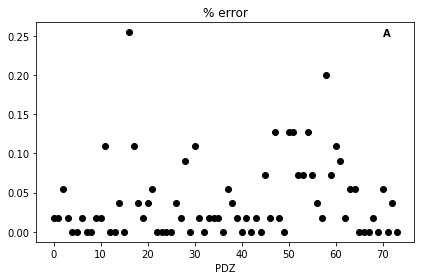

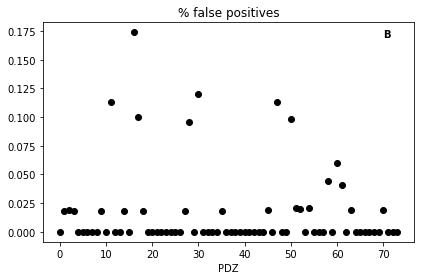

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


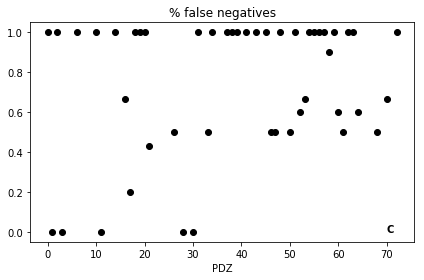

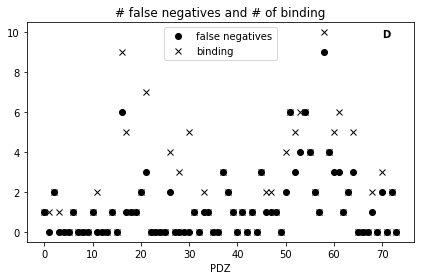

In [39]:
print('Using ',Nbase,' bases')
print(np.where(risf[:,9]==1000000))

plt.plot(risf[:,6]/risf[:,3],'ko')
plt.title('% error')
plt.xlabel('PDZ')
plt.text(70, 0.25, 'A', fontweight='bold')
plt.tight_layout()
#plt.savefig('error.pdf')
plt.show()

plt.plot(risf[:,7]/(risf[:,3]-risf[:,4]),'ko')
plt.title('% false positives')
plt.xlabel('PDZ')
plt.text(70, 0.17, 'B', fontweight='bold')
plt.tight_layout()
#plt.savefig('falsepos.pdf')
plt.show()

plt.plot(risf[:,8]/risf[:,4],'ko')
plt.title('% false negatives')
plt.xlabel('PDZ')
plt.text(70, 0., 'C', fontweight='bold')
plt.tight_layout()
#plt.savefig('falseneg.pdf')
plt.show()

plt.plot(risf[:,8],'ko',label='false negatives')
plt.plot(risf[:,4],'kx',label='binding')
plt.title('# false negatives and # of binding')
plt.xlabel('PDZ')
plt.legend()
plt.text(70, 9.75, 'D', fontweight='bold')
plt.tight_layout()
#plt.savefig('falseneg2.pdf')
plt.show()

Question 5 (Optional) Use the Lasso algorithm to fit the training set. Compare the quality of the predictions on the test set with the perceptron result.

In [40]:
# Choose one PDZ and split the data in training and test set -- without using sklearn
myPDZ=11
y=getY(myPDZ)
print("PDZ: ", PDZ[myPDZ])
print("Total sample:",Npep,' of which binding: ',sum(y>0))

Msplit=150
yTrain = y[0:Msplit]
yTest = y[Msplit:]
XTrain = X[0:Msplit,:]
XTest = X[Msplit:,:]

print("Training Samples: ", len(yTrain), " of which binding:",sum(yTrain>0))
print("Testing  Samples: ", len(yTest)," of which binding:",sum(yTest>0))



PDZ:  Gm1582 (2/3)
Total sample: 217  of which binding:  16
Training Samples:  150  of which binding: 13
Testing  Samples:  67  of which binding: 3


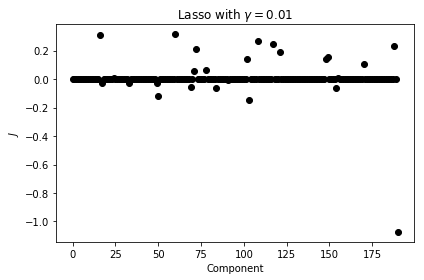

Training errors:  0.08
Test errors:  0.04477611940298507
False positives:  0.0
False negatives:  1.0


In [41]:
# Test lasso
from sklearn import linear_model

lasso = linear_model.Lasso(alpha=0.01,fit_intercept=False)
lasso.fit(XTrain,yTrain)

K=lasso.coef_

plt.plot(K,"ko")
plt.xlabel("Component")
plt.ylabel("$J$")
plt.title("Lasso with $\gamma=0.01$")
plt.tight_layout()
plt.savefig('Jlasso.pdf')
plt.show()


zTrain = np.sign(np.dot(XTrain,K))
zTest = np.sign(np.dot(XTest,K))
print('Training errors: ',np.count_nonzero(zTrain*yTrain == -1)/len(yTrain))
print('Test errors: ',np.count_nonzero(zTest*yTest == -1)/len(yTest))
print('False positives: ',len(myset(yTest,-1) & myset(zTest,1))/len(myset(yTest,-1)))
print('False negatives: ',len(myset(yTest,1) & myset(zTest,-1))/len(myset(yTest,1)))


Question 5 (Optional) use the Keras package to train a perceptron, with a sigmoid activation function and a binary cross-entropy loss (in a 0, 1 representation of the binding labels)


In [43]:
#Keras
# Remove the last column from the matrix X (Keras already adds a bias)
Ninput = np.shape(X)[1]-1
Xk = X[:,:Ninput]
print(Ninput)
print(np.shape(Xk))

190
(217, 190)


In [44]:
#Get for a given PDZ the label vector Y (in [0,1] representation it's better for Keras)
def getYk(iPDZ):
    Y = np.zeros(Npep)
    for j in range(Npep):
        Kd=int_matrix.get_value(PDZ[iPDZ],pep[j][0])
        if (Kd>0 and Kd<100000):
            Y[j]=1
    return Y

In [45]:
from keras.layers import Input, Dense
from keras.models import Model
input_seq = Input(shape=(Ninput,))
encoded = Dense(1, activation='sigmoid')(input_seq)

perceptron_k = Model(input_seq, encoded)
perceptron_k.compile(optimizer='adadelta', loss='binary_crossentropy')
perceptron_k.summary()

Using TensorFlow backend.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([(

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 190)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 191       
Total params: 191
Trainable params: 191
Non-trainable params: 0
_________________________________________________________________


In [46]:
# Choose one PDZ and split the data in training and test set
myPDZ=11
yk=getYk(myPDZ)
print("PDZ: ", PDZ[myPDZ])
print("Total sample:",Npep,' of which binding: ',sum(yk>0))

Msplit=150
yTrain = yk[0:Msplit]
yTest = yk[Msplit:]
XTrain = Xk[0:Msplit,:]
XTest = Xk[Msplit:,:]

print("Training Samples: ", len(yTrain), " of which binding:",sum(yTrain>0))
print("Testing  Samples: ", len(yTest)," of which binding:",sum(yTest>0))

PDZ:  Gm1582 (2/3)
Total sample: 217  of which binding:  16
Training Samples:  150  of which binding: 13
Testing  Samples:  67  of which binding: 3


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """


In [47]:
#Training the model
history = perceptron_k.fit(XTrain, yTrain,
                epochs=5000,
                batch_size=50,
                shuffle=True,
                validation_data=(XTest, yTest))

Train on 150 samples, validate on 67 samples
Epoch 1/5000
150/150 [==============================] - 0s 1ms/step - loss: 0.7483 - val_loss: 0.7365
Epoch 2/5000
150/150 [==============================] - 0s 43us/step - loss: 0.7314 - val_loss: 0.7195
Epoch 3/5000
150/150 [==============================] - 0s 44us/step - loss: 0.7153 - val_loss: 0.7033
Epoch 4/5000
150/150 [==============================] - 0s 41us/step - loss: 0.6997 - val_loss: 0.6877
Epoch 5/5000
150/150 [==============================] - 0s 44us/step - loss: 0.6847 - val_loss: 0.6726
Epoch 6/5000
150/150 [==============================] - 0s 41us/step - loss: 0.6703 - val_loss: 0.6581
Epoch 7/5000
150/150 [==============================] - 0s 40us/step - loss: 0.6564 - val_loss: 0.6441
Epoch 8/5000
150/150 [==============================] - 0s 35us/step - loss: 0.6429 - val_loss: 0.6306
Epoch 9/5000
150/150 [==============================] - 0s 36us/step - loss: 0.6300 - val_loss: 0.6176
Epoch 10/5000
150/150 [======

150/150 [==============================] - 0s 37us/step - loss: 0.2859 - val_loss: 0.2664
Epoch 80/5000
150/150 [==============================] - ETA: 0s - loss: 0.300 - 0s 46us/step - loss: 0.2840 - val_loss: 0.2647
Epoch 81/5000
150/150 [==============================] - 0s 38us/step - loss: 0.2823 - val_loss: 0.2630
Epoch 82/5000
150/150 [==============================] - 0s 45us/step - loss: 0.2805 - val_loss: 0.2613
Epoch 83/5000
150/150 [==============================] - 0s 40us/step - loss: 0.2787 - val_loss: 0.2597
Epoch 84/5000
150/150 [==============================] - 0s 40us/step - loss: 0.2771 - val_loss: 0.2581
Epoch 85/5000
150/150 [==============================] - 0s 36us/step - loss: 0.2754 - val_loss: 0.2566
Epoch 86/5000
150/150 [==============================] - 0s 37us/step - loss: 0.2737 - val_loss: 0.2550
Epoch 87/5000
150/150 [==============================] - 0s 39us/step - loss: 0.2720 - val_loss: 0.2535
Epoch 88/5000
150/150 [==============================]

150/150 [==============================] - 0s 38us/step - loss: 0.1889 - val_loss: 0.1931
Epoch 158/5000
150/150 [==============================] - 0s 37us/step - loss: 0.1879 - val_loss: 0.1926
Epoch 159/5000
150/150 [==============================] - 0s 43us/step - loss: 0.1870 - val_loss: 0.1922
Epoch 160/5000
150/150 [==============================] - 0s 36us/step - loss: 0.1862 - val_loss: 0.1917
Epoch 161/5000
150/150 [==============================] - 0s 37us/step - loss: 0.1852 - val_loss: 0.1912
Epoch 162/5000
150/150 [==============================] - 0s 38us/step - loss: 0.1843 - val_loss: 0.1908
Epoch 163/5000
150/150 [==============================] - 0s 41us/step - loss: 0.1833 - val_loss: 0.1903
Epoch 164/5000
150/150 [==============================] - 0s 39us/step - loss: 0.1824 - val_loss: 0.1898
Epoch 165/5000
150/150 [==============================] - 0s 40us/step - loss: 0.1816 - val_loss: 0.1894
Epoch 166/5000
150/150 [==============================] - 0s 36us/step

150/150 [==============================] - 0s 41us/step - loss: 0.1299 - val_loss: 0.1681
Epoch 236/5000
150/150 [==============================] - 0s 42us/step - loss: 0.1294 - val_loss: 0.1679
Epoch 237/5000
150/150 [==============================] - 0s 38us/step - loss: 0.1287 - val_loss: 0.1677
Epoch 238/5000
150/150 [==============================] - 0s 43us/step - loss: 0.1281 - val_loss: 0.1676
Epoch 239/5000
150/150 [==============================] - 0s 43us/step - loss: 0.1277 - val_loss: 0.1674
Epoch 240/5000
150/150 [==============================] - 0s 44us/step - loss: 0.1270 - val_loss: 0.1672
Epoch 241/5000
150/150 [==============================] - 0s 42us/step - loss: 0.1264 - val_loss: 0.1670
Epoch 242/5000
150/150 [==============================] - 0s 45us/step - loss: 0.1258 - val_loss: 0.1668
Epoch 243/5000
150/150 [==============================] - 0s 41us/step - loss: 0.1253 - val_loss: 0.1666
Epoch 244/5000
150/150 [==============================] - 0s 45us/step

Epoch 313/5000
150/150 [==============================] - 0s 43us/step - loss: 0.0921 - val_loss: 0.1579
Epoch 314/5000
150/150 [==============================] - 0s 41us/step - loss: 0.0917 - val_loss: 0.1578
Epoch 315/5000
150/150 [==============================] - 0s 43us/step - loss: 0.0914 - val_loss: 0.1578
Epoch 316/5000
150/150 [==============================] - 0s 42us/step - loss: 0.0909 - val_loss: 0.1577
Epoch 317/5000
150/150 [==============================] - 0s 46us/step - loss: 0.0905 - val_loss: 0.1576
Epoch 318/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0902 - val_loss: 0.1575
Epoch 319/5000
150/150 [==============================] - 0s 40us/step - loss: 0.0898 - val_loss: 0.1575
Epoch 320/5000
150/150 [==============================] - 0s 41us/step - loss: 0.0894 - val_loss: 0.1574
Epoch 321/5000
150/150 [==============================] - 0s 43us/step - loss: 0.0891 - val_loss: 0.1573
Epoch 322/5000
150/150 [==============================]

150/150 [==============================] - 0s 38us/step - loss: 0.0678 - val_loss: 0.1540
Epoch 392/5000
150/150 [==============================] - 0s 43us/step - loss: 0.0676 - val_loss: 0.1540
Epoch 393/5000
150/150 [==============================] - 0s 48us/step - loss: 0.0672 - val_loss: 0.1540
Epoch 394/5000
150/150 [==============================] - 0s 41us/step - loss: 0.0670 - val_loss: 0.1539
Epoch 395/5000
150/150 [==============================] - 0s 41us/step - loss: 0.0668 - val_loss: 0.1539
Epoch 396/5000
150/150 [==============================] - 0s 45us/step - loss: 0.0665 - val_loss: 0.1539
Epoch 397/5000
150/150 [==============================] - 0s 40us/step - loss: 0.0662 - val_loss: 0.1539
Epoch 398/5000
150/150 [==============================] - 0s 42us/step - loss: 0.0660 - val_loss: 0.1538
Epoch 399/5000
150/150 [==============================] - 0s 45us/step - loss: 0.0657 - val_loss: 0.1538
Epoch 400/5000
150/150 [==============================] - 0s 47us/step

150/150 [==============================] - 0s 45us/step - loss: 0.0517 - val_loss: 0.1529
Epoch 469/5000
150/150 [==============================] - 0s 40us/step - loss: 0.0515 - val_loss: 0.1529
Epoch 470/5000
150/150 [==============================] - 0s 44us/step - loss: 0.0513 - val_loss: 0.1529
Epoch 471/5000
150/150 [==============================] - ETA: 0s - loss: 0.078 - 0s 43us/step - loss: 0.0511 - val_loss: 0.1529
Epoch 472/5000
150/150 [==============================] - 0s 44us/step - loss: 0.0510 - val_loss: 0.1529
Epoch 473/5000
150/150 [==============================] - 0s 43us/step - loss: 0.0508 - val_loss: 0.1529
Epoch 474/5000
150/150 [==============================] - 0s 41us/step - loss: 0.0506 - val_loss: 0.1528
Epoch 475/5000
150/150 [==============================] - ETA: 0s - loss: 0.042 - 0s 39us/step - loss: 0.0505 - val_loss: 0.1529
Epoch 476/5000
150/150 [==============================] - 0s 38us/step - loss: 0.0503 - val_loss: 0.1528
Epoch 477/5000
150/150

150/150 [==============================] - 0s 40us/step - loss: 0.0403 - val_loss: 0.1526
Epoch 546/5000
150/150 [==============================] - 0s 44us/step - loss: 0.0402 - val_loss: 0.1526
Epoch 547/5000
150/150 [==============================] - 0s 43us/step - loss: 0.0401 - val_loss: 0.1525
Epoch 548/5000
150/150 [==============================] - 0s 48us/step - loss: 0.0399 - val_loss: 0.1525
Epoch 549/5000
150/150 [==============================] - 0s 41us/step - loss: 0.0398 - val_loss: 0.1525
Epoch 550/5000
150/150 [==============================] - 0s 40us/step - loss: 0.0397 - val_loss: 0.1525
Epoch 551/5000
150/150 [==============================] - 0s 40us/step - loss: 0.0396 - val_loss: 0.1525
Epoch 552/5000
150/150 [==============================] - 0s 44us/step - loss: 0.0394 - val_loss: 0.1525
Epoch 553/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0394 - val_loss: 0.1525
Epoch 554/5000
150/150 [==============================] - 0s 38us/step

150/150 [==============================] - 0s 38us/step - loss: 0.0320 - val_loss: 0.1522
Epoch 623/5000
150/150 [==============================] - 0s 38us/step - loss: 0.0319 - val_loss: 0.1522
Epoch 624/5000
150/150 [==============================] - 0s 35us/step - loss: 0.0319 - val_loss: 0.1522
Epoch 625/5000
150/150 [==============================] - 0s 40us/step - loss: 0.0318 - val_loss: 0.1522
Epoch 626/5000
150/150 [==============================] - 0s 40us/step - loss: 0.0317 - val_loss: 0.1522
Epoch 627/5000
150/150 [==============================] - 0s 47us/step - loss: 0.0316 - val_loss: 0.1522
Epoch 628/5000
150/150 [==============================] - 0s 43us/step - loss: 0.0315 - val_loss: 0.1522
Epoch 629/5000
150/150 [==============================] - 0s 43us/step - loss: 0.0314 - val_loss: 0.1522
Epoch 630/5000
150/150 [==============================] - 0s 44us/step - loss: 0.0313 - val_loss: 0.1522
Epoch 631/5000
150/150 [==============================] - 0s 44us/step

150/150 [==============================] - 0s 39us/step - loss: 0.0259 - val_loss: 0.1521
Epoch 700/5000
150/150 [==============================] - 0s 38us/step - loss: 0.0258 - val_loss: 0.1521
Epoch 701/5000
150/150 [==============================] - 0s 41us/step - loss: 0.0257 - val_loss: 0.1521
Epoch 702/5000
150/150 [==============================] - 0s 42us/step - loss: 0.0256 - val_loss: 0.1521
Epoch 703/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0256 - val_loss: 0.1521
Epoch 704/5000
150/150 [==============================] - 0s 38us/step - loss: 0.0255 - val_loss: 0.1521
Epoch 705/5000
150/150 [==============================] - 0s 38us/step - loss: 0.0254 - val_loss: 0.1521
Epoch 706/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0254 - val_loss: 0.1521
Epoch 707/5000
150/150 [==============================] - 0s 41us/step - loss: 0.0253 - val_loss: 0.1521
Epoch 708/5000
150/150 [==============================] - 0s 36us/step

150/150 [==============================] - 0s 36us/step - loss: 0.0211 - val_loss: 0.1519
Epoch 778/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0210 - val_loss: 0.1519
Epoch 779/5000
150/150 [==============================] - 0s 40us/step - loss: 0.0210 - val_loss: 0.1519
Epoch 780/5000
150/150 [==============================] - 0s 38us/step - loss: 0.0209 - val_loss: 0.1519
Epoch 781/5000
150/150 [==============================] - 0s 36us/step - loss: 0.0209 - val_loss: 0.1519
Epoch 782/5000
150/150 [==============================] - 0s 38us/step - loss: 0.0208 - val_loss: 0.1519
Epoch 783/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0208 - val_loss: 0.1519
Epoch 784/5000
150/150 [==============================] - 0s 38us/step - loss: 0.0207 - val_loss: 0.1519
Epoch 785/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0207 - val_loss: 0.1519
Epoch 786/5000
150/150 [==============================] - 0s 37us/step

150/150 [==============================] - 0s 39us/step - loss: 0.0175 - val_loss: 0.1520
Epoch 855/5000
150/150 [==============================] - 0s 36us/step - loss: 0.0175 - val_loss: 0.1520
Epoch 856/5000
150/150 [==============================] - ETA: 0s - loss: 0.017 - 0s 41us/step - loss: 0.0175 - val_loss: 0.1520
Epoch 857/5000
150/150 [==============================] - ETA: 0s - loss: 0.019 - 0s 37us/step - loss: 0.0174 - val_loss: 0.1520
Epoch 858/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0174 - val_loss: 0.1520
Epoch 859/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0173 - val_loss: 0.1520
Epoch 860/5000
150/150 [==============================] - 0s 37us/step - loss: 0.0173 - val_loss: 0.1520
Epoch 861/5000
150/150 [==============================] - 0s 37us/step - loss: 0.0172 - val_loss: 0.1520
Epoch 862/5000
150/150 [==============================] - 0s 36us/step - loss: 0.0172 - val_loss: 0.1519
Epoch 863/5000
150/150

150/150 [==============================] - 0s 41us/step - loss: 0.0148 - val_loss: 0.1520
Epoch 932/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0147 - val_loss: 0.1520
Epoch 933/5000
150/150 [==============================] - 0s 38us/step - loss: 0.0147 - val_loss: 0.1520
Epoch 934/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0147 - val_loss: 0.1520
Epoch 935/5000
150/150 [==============================] - 0s 44us/step - loss: 0.0146 - val_loss: 0.1520
Epoch 936/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0146 - val_loss: 0.1520
Epoch 937/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0146 - val_loss: 0.1520
Epoch 938/5000
150/150 [==============================] - 0s 37us/step - loss: 0.0146 - val_loss: 0.1520
Epoch 939/5000
150/150 [==============================] - 0s 37us/step - loss: 0.0145 - val_loss: 0.1520
Epoch 940/5000
150/150 [==============================] - 0s 37us/step

150/150 [==============================] - 0s 45us/step - loss: 0.0126 - val_loss: 0.1521
Epoch 1010/5000
150/150 [==============================] - 0s 41us/step - loss: 0.0126 - val_loss: 0.1521
Epoch 1011/5000
150/150 [==============================] - 0s 49us/step - loss: 0.0125 - val_loss: 0.1521
Epoch 1012/5000
150/150 [==============================] - 0s 44us/step - loss: 0.0125 - val_loss: 0.1521
Epoch 1013/5000
150/150 [==============================] - 0s 45us/step - loss: 0.0125 - val_loss: 0.1521
Epoch 1014/5000
150/150 [==============================] - 0s 43us/step - loss: 0.0125 - val_loss: 0.1521
Epoch 1015/5000
150/150 [==============================] - 0s 44us/step - loss: 0.0124 - val_loss: 0.1521
Epoch 1016/5000
150/150 [==============================] - 0s 44us/step - loss: 0.0124 - val_loss: 0.1521
Epoch 1017/5000
150/150 [==============================] - 0s 43us/step - loss: 0.0124 - val_loss: 0.1521
Epoch 1018/5000
150/150 [==============================] - 0s 

Epoch 1086/5000
150/150 [==============================] - 0s 41us/step - loss: 0.0109 - val_loss: 0.1522
Epoch 1087/5000
150/150 [==============================] - 0s 38us/step - loss: 0.0109 - val_loss: 0.1522
Epoch 1088/5000
150/150 [==============================] - 0s 44us/step - loss: 0.0108 - val_loss: 0.1522
Epoch 1089/5000
150/150 [==============================] - 0s 45us/step - loss: 0.0108 - val_loss: 0.1522
Epoch 1090/5000
150/150 [==============================] - 0s 44us/step - loss: 0.0108 - val_loss: 0.1522
Epoch 1091/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0108 - val_loss: 0.1522
Epoch 1092/5000
150/150 [==============================] - 0s 38us/step - loss: 0.0108 - val_loss: 0.1522
Epoch 1093/5000
150/150 [==============================] - 0s 38us/step - loss: 0.0107 - val_loss: 0.1522
Epoch 1094/5000
150/150 [==============================] - 0s 38us/step - loss: 0.0107 - val_loss: 0.1522
Epoch 1095/5000
150/150 [=====================

150/150 [==============================] - 0s 41us/step - loss: 0.0095 - val_loss: 0.1522
Epoch 1164/5000
150/150 [==============================] - 0s 40us/step - loss: 0.0095 - val_loss: 0.1522
Epoch 1165/5000
150/150 [==============================] - 0s 38us/step - loss: 0.0095 - val_loss: 0.1522
Epoch 1166/5000
150/150 [==============================] - ETA: 0s - loss: 0.008 - 0s 36us/step - loss: 0.0095 - val_loss: 0.1522
Epoch 1167/5000
150/150 [==============================] - 0s 37us/step - loss: 0.0094 - val_loss: 0.1522
Epoch 1168/5000
150/150 [==============================] - ETA: 0s - loss: 0.011 - 0s 39us/step - loss: 0.0094 - val_loss: 0.1522
Epoch 1169/5000
150/150 [==============================] - 0s 34us/step - loss: 0.0094 - val_loss: 0.1522
Epoch 1170/5000
150/150 [==============================] - 0s 42us/step - loss: 0.0094 - val_loss: 0.1522
Epoch 1171/5000
150/150 [==============================] - 0s 36us/step - loss: 0.0094 - val_loss: 0.1522
Epoch 1172/500

150/150 [==============================] - 0s 37us/step - loss: 0.0084 - val_loss: 0.1523
Epoch 1240/5000
150/150 [==============================] - 0s 38us/step - loss: 0.0084 - val_loss: 0.1523
Epoch 1241/5000
150/150 [==============================] - 0s 38us/step - loss: 0.0084 - val_loss: 0.1523
Epoch 1242/5000
150/150 [==============================] - 0s 43us/step - loss: 0.0084 - val_loss: 0.1523
Epoch 1243/5000
150/150 [==============================] - 0s 35us/step - loss: 0.0084 - val_loss: 0.1524
Epoch 1244/5000
150/150 [==============================] - 0s 37us/step - loss: 0.0084 - val_loss: 0.1524
Epoch 1245/5000
150/150 [==============================] - 0s 38us/step - loss: 0.0083 - val_loss: 0.1524
Epoch 1246/5000
150/150 [==============================] - 0s 34us/step - loss: 0.0083 - val_loss: 0.1524
Epoch 1247/5000
150/150 [==============================] - 0s 40us/step - loss: 0.0083 - val_loss: 0.1524
Epoch 1248/5000
150/150 [==============================] - 0s 

150/150 [==============================] - 0s 42us/step - loss: 0.0075 - val_loss: 0.1525
Epoch 1316/5000
150/150 [==============================] - 0s 37us/step - loss: 0.0075 - val_loss: 0.1525
Epoch 1317/5000
150/150 [==============================] - 0s 41us/step - loss: 0.0075 - val_loss: 0.1525
Epoch 1318/5000
150/150 [==============================] - 0s 37us/step - loss: 0.0075 - val_loss: 0.1525
Epoch 1319/5000
150/150 [==============================] - 0s 44us/step - loss: 0.0075 - val_loss: 0.1525
Epoch 1320/5000
150/150 [==============================] - 0s 36us/step - loss: 0.0075 - val_loss: 0.1525
Epoch 1321/5000
150/150 [==============================] - 0s 38us/step - loss: 0.0075 - val_loss: 0.1525
Epoch 1322/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0074 - val_loss: 0.1525
Epoch 1323/5000
150/150 [==============================] - 0s 36us/step - loss: 0.0074 - val_loss: 0.1525
Epoch 1324/5000
150/150 [==============================] - 0s 

150/150 [==============================] - 0s 39us/step - loss: 0.0068 - val_loss: 0.1526
Epoch 1393/5000
150/150 [==============================] - 0s 35us/step - loss: 0.0068 - val_loss: 0.1526
Epoch 1394/5000
150/150 [==============================] - 0s 37us/step - loss: 0.0068 - val_loss: 0.1526
Epoch 1395/5000
150/150 [==============================] - 0s 35us/step - loss: 0.0067 - val_loss: 0.1526
Epoch 1396/5000
150/150 [==============================] - 0s 36us/step - loss: 0.0067 - val_loss: 0.1526
Epoch 1397/5000
150/150 [==============================] - 0s 41us/step - loss: 0.0067 - val_loss: 0.1527
Epoch 1398/5000
150/150 [==============================] - 0s 37us/step - loss: 0.0067 - val_loss: 0.1527
Epoch 1399/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0067 - val_loss: 0.1527
Epoch 1400/5000
150/150 [==============================] - 0s 37us/step - loss: 0.0067 - val_loss: 0.1527
Epoch 1401/5000
150/150 [==============================] - 0s 

Epoch 1469/5000
150/150 [==============================] - 0s 38us/step - loss: 0.0061 - val_loss: 0.1528
Epoch 1470/5000
150/150 [==============================] - 0s 41us/step - loss: 0.0061 - val_loss: 0.1528
Epoch 1471/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0061 - val_loss: 0.1528
Epoch 1472/5000
150/150 [==============================] - 0s 35us/step - loss: 0.0061 - val_loss: 0.1528
Epoch 1473/5000
150/150 [==============================] - 0s 37us/step - loss: 0.0061 - val_loss: 0.1528
Epoch 1474/5000
150/150 [==============================] - 0s 37us/step - loss: 0.0061 - val_loss: 0.1528
Epoch 1475/5000
150/150 [==============================] - 0s 38us/step - loss: 0.0061 - val_loss: 0.1528
Epoch 1476/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0061 - val_loss: 0.1528
Epoch 1477/5000
150/150 [==============================] - 0s 36us/step - loss: 0.0061 - val_loss: 0.1528
Epoch 1478/5000
150/150 [=====================

150/150 [==============================] - 0s 44us/step - loss: 0.0056 - val_loss: 0.1530
Epoch 1547/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0056 - val_loss: 0.1530
Epoch 1548/5000
150/150 [==============================] - 0s 40us/step - loss: 0.0056 - val_loss: 0.1530
Epoch 1549/5000
150/150 [==============================] - 0s 36us/step - loss: 0.0056 - val_loss: 0.1530
Epoch 1550/5000
150/150 [==============================] - 0s 41us/step - loss: 0.0056 - val_loss: 0.1530
Epoch 1551/5000
150/150 [==============================] - 0s 37us/step - loss: 0.0056 - val_loss: 0.1530
Epoch 1552/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0056 - val_loss: 0.1530
Epoch 1553/5000
150/150 [==============================] - 0s 41us/step - loss: 0.0056 - val_loss: 0.1530
Epoch 1554/5000
150/150 [==============================] - 0s 45us/step - loss: 0.0056 - val_loss: 0.1530
Epoch 1555/5000
150/150 [==============================] - 0s 

150/150 [==============================] - 0s 39us/step - loss: 0.0052 - val_loss: 0.1532
Epoch 1624/5000
150/150 [==============================] - 0s 37us/step - loss: 0.0052 - val_loss: 0.1532
Epoch 1625/5000
150/150 [==============================] - 0s 42us/step - loss: 0.0051 - val_loss: 0.1532
Epoch 1626/5000
150/150 [==============================] - 0s 38us/step - loss: 0.0051 - val_loss: 0.1532
Epoch 1627/5000
150/150 [==============================] - ETA: 0s - loss: 0.005 - 0s 39us/step - loss: 0.0051 - val_loss: 0.1532
Epoch 1628/5000
150/150 [==============================] - 0s 41us/step - loss: 0.0051 - val_loss: 0.1532
Epoch 1629/5000
150/150 [==============================] - 0s 37us/step - loss: 0.0051 - val_loss: 0.1532
Epoch 1630/5000
150/150 [==============================] - 0s 38us/step - loss: 0.0051 - val_loss: 0.1532
Epoch 1631/5000
150/150 [==============================] - 0s 38us/step - loss: 0.0051 - val_loss: 0.1532
Epoch 1632/5000
150/150 [=============

150/150 [==============================] - 0s 36us/step - loss: 0.0048 - val_loss: 0.1534
Epoch 1701/5000
150/150 [==============================] - 0s 37us/step - loss: 0.0048 - val_loss: 0.1534
Epoch 1702/5000
150/150 [==============================] - 0s 37us/step - loss: 0.0048 - val_loss: 0.1534
Epoch 1703/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0048 - val_loss: 0.1534
Epoch 1704/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0047 - val_loss: 0.1534
Epoch 1705/5000
150/150 [==============================] - 0s 37us/step - loss: 0.0047 - val_loss: 0.1534
Epoch 1706/5000
150/150 [==============================] - ETA: 0s - loss: 0.003 - 0s 37us/step - loss: 0.0047 - val_loss: 0.1534
Epoch 1707/5000
150/150 [==============================] - 0s 43us/step - loss: 0.0047 - val_loss: 0.1534
Epoch 1708/5000
150/150 [==============================] - 0s 36us/step - loss: 0.0047 - val_loss: 0.1534
Epoch 1709/5000
150/150 [=============

Epoch 1777/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0044 - val_loss: 0.1536
Epoch 1778/5000
150/150 [==============================] - 0s 36us/step - loss: 0.0044 - val_loss: 0.1536
Epoch 1779/5000
150/150 [==============================] - 0s 37us/step - loss: 0.0044 - val_loss: 0.1536
Epoch 1780/5000
150/150 [==============================] - 0s 42us/step - loss: 0.0044 - val_loss: 0.1536
Epoch 1781/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0044 - val_loss: 0.1536
Epoch 1782/5000
150/150 [==============================] - 0s 36us/step - loss: 0.0044 - val_loss: 0.1536
Epoch 1783/5000
150/150 [==============================] - 0s 38us/step - loss: 0.0044 - val_loss: 0.1536
Epoch 1784/5000
150/150 [==============================] - 0s 41us/step - loss: 0.0044 - val_loss: 0.1536
Epoch 1785/5000
150/150 [==============================] - 0s 38us/step - loss: 0.0044 - val_loss: 0.1536
Epoch 1786/5000
150/150 [=====================

150/150 [==============================] - 0s 42us/step - loss: 0.0041 - val_loss: 0.1539
Epoch 1855/5000
150/150 [==============================] - 0s 36us/step - loss: 0.0041 - val_loss: 0.1539
Epoch 1856/5000
150/150 [==============================] - 0s 42us/step - loss: 0.0041 - val_loss: 0.1539
Epoch 1857/5000
150/150 [==============================] - 0s 42us/step - loss: 0.0041 - val_loss: 0.1539
Epoch 1858/5000
150/150 [==============================] - 0s 40us/step - loss: 0.0041 - val_loss: 0.1539
Epoch 1859/5000
150/150 [==============================] - 0s 40us/step - loss: 0.0041 - val_loss: 0.1539
Epoch 1860/5000
150/150 [==============================] - 0s 40us/step - loss: 0.0041 - val_loss: 0.1539
Epoch 1861/5000
150/150 [==============================] - 0s 35us/step - loss: 0.0041 - val_loss: 0.1539
Epoch 1862/5000
150/150 [==============================] - 0s 40us/step - loss: 0.0041 - val_loss: 0.1539
Epoch 1863/5000
150/150 [==============================] - 0s 

Epoch 1931/5000
150/150 [==============================] - 0s 40us/step - loss: 0.0039 - val_loss: 0.1541
Epoch 1932/5000
150/150 [==============================] - 0s 44us/step - loss: 0.0039 - val_loss: 0.1541
Epoch 1933/5000
150/150 [==============================] - 0s 46us/step - loss: 0.0039 - val_loss: 0.1541
Epoch 1934/5000
150/150 [==============================] - 0s 41us/step - loss: 0.0039 - val_loss: 0.1541
Epoch 1935/5000
150/150 [==============================] - 0s 40us/step - loss: 0.0039 - val_loss: 0.1541
Epoch 1936/5000
150/150 [==============================] - 0s 40us/step - loss: 0.0039 - val_loss: 0.1541
Epoch 1937/5000
150/150 [==============================] - 0s 44us/step - loss: 0.0039 - val_loss: 0.1541
Epoch 1938/5000
150/150 [==============================] - 0s 44us/step - loss: 0.0039 - val_loss: 0.1541
Epoch 1939/5000
150/150 [==============================] - ETA: 0s - loss: 0.003 - 0s 42us/step - loss: 0.0038 - val_loss: 0.1541
Epoch 1940/5000
150/15

Epoch 2008/5000
150/150 [==============================] - 0s 40us/step - loss: 0.0036 - val_loss: 0.1543
Epoch 2009/5000
150/150 [==============================] - 0s 42us/step - loss: 0.0036 - val_loss: 0.1543
Epoch 2010/5000
150/150 [==============================] - 0s 44us/step - loss: 0.0036 - val_loss: 0.1543
Epoch 2011/5000
150/150 [==============================] - 0s 42us/step - loss: 0.0036 - val_loss: 0.1543
Epoch 2012/5000
150/150 [==============================] - 0s 46us/step - loss: 0.0036 - val_loss: 0.1543
Epoch 2013/5000
150/150 [==============================] - 0s 44us/step - loss: 0.0036 - val_loss: 0.1544
Epoch 2014/5000
150/150 [==============================] - 0s 41us/step - loss: 0.0036 - val_loss: 0.1544
Epoch 2015/5000
150/150 [==============================] - 0s 46us/step - loss: 0.0036 - val_loss: 0.1544
Epoch 2016/5000
150/150 [==============================] - 0s 40us/step - loss: 0.0036 - val_loss: 0.1544
Epoch 2017/5000
150/150 [=====================

150/150 [==============================] - 0s 40us/step - loss: 0.0034 - val_loss: 0.1546
Epoch 2086/5000
150/150 [==============================] - 0s 38us/step - loss: 0.0034 - val_loss: 0.1546
Epoch 2087/5000
150/150 [==============================] - 0s 38us/step - loss: 0.0034 - val_loss: 0.1546
Epoch 2088/5000
150/150 [==============================] - 0s 38us/step - loss: 0.0034 - val_loss: 0.1546
Epoch 2089/5000
150/150 [==============================] - 0s 37us/step - loss: 0.0034 - val_loss: 0.1546
Epoch 2090/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0034 - val_loss: 0.1546
Epoch 2091/5000
150/150 [==============================] - 0s 35us/step - loss: 0.0034 - val_loss: 0.1546
Epoch 2092/5000
150/150 [==============================] - 0s 44us/step - loss: 0.0034 - val_loss: 0.1546
Epoch 2093/5000
150/150 [==============================] - 0s 37us/step - loss: 0.0034 - val_loss: 0.1546
Epoch 2094/5000
150/150 [==============================] - 0s 

Epoch 2162/5000
150/150 [==============================] - 0s 44us/step - loss: 0.0032 - val_loss: 0.1549
Epoch 2163/5000
150/150 [==============================] - 0s 43us/step - loss: 0.0032 - val_loss: 0.1549
Epoch 2164/5000
150/150 [==============================] - 0s 36us/step - loss: 0.0032 - val_loss: 0.1549
Epoch 2165/5000
150/150 [==============================] - ETA: 0s - loss: 0.002 - 0s 41us/step - loss: 0.0032 - val_loss: 0.1549
Epoch 2166/5000
150/150 [==============================] - 0s 38us/step - loss: 0.0032 - val_loss: 0.1549
Epoch 2167/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0032 - val_loss: 0.1549
Epoch 2168/5000
150/150 [==============================] - 0s 36us/step - loss: 0.0032 - val_loss: 0.1549
Epoch 2169/5000
150/150 [==============================] - 0s 44us/step - loss: 0.0032 - val_loss: 0.1549
Epoch 2170/5000
150/150 [==============================] - 0s 49us/step - loss: 0.0032 - val_loss: 0.1549
Epoch 2171/5000
150/15

150/150 [==============================] - 0s 36us/step - loss: 0.0031 - val_loss: 0.1551
Epoch 2239/5000
150/150 [==============================] - 0s 42us/step - loss: 0.0031 - val_loss: 0.1551
Epoch 2240/5000
150/150 [==============================] - 0s 38us/step - loss: 0.0031 - val_loss: 0.1551
Epoch 2241/5000
150/150 [==============================] - 0s 37us/step - loss: 0.0031 - val_loss: 0.1551
Epoch 2242/5000
150/150 [==============================] - 0s 38us/step - loss: 0.0031 - val_loss: 0.1551
Epoch 2243/5000
150/150 [==============================] - 0s 40us/step - loss: 0.0031 - val_loss: 0.1551
Epoch 2244/5000
150/150 [==============================] - 0s 41us/step - loss: 0.0031 - val_loss: 0.1551
Epoch 2245/5000
150/150 [==============================] - ETA: 0s - loss: 0.003 - 0s 39us/step - loss: 0.0031 - val_loss: 0.1551
Epoch 2246/5000
150/150 [==============================] - 0s 41us/step - loss: 0.0031 - val_loss: 0.1551
Epoch 2247/5000
150/150 [=============

150/150 [==============================] - 0s 39us/step - loss: 0.0029 - val_loss: 0.1553
Epoch 2315/5000
150/150 [==============================] - 0s 37us/step - loss: 0.0029 - val_loss: 0.1553
Epoch 2316/5000
150/150 [==============================] - 0s 41us/step - loss: 0.0029 - val_loss: 0.1553
Epoch 2317/5000
150/150 [==============================] - 0s 38us/step - loss: 0.0029 - val_loss: 0.1553
Epoch 2318/5000
150/150 [==============================] - 0s 41us/step - loss: 0.0029 - val_loss: 0.1553
Epoch 2319/5000
150/150 [==============================] - 0s 40us/step - loss: 0.0029 - val_loss: 0.1553
Epoch 2320/5000
150/150 [==============================] - 0s 41us/step - loss: 0.0029 - val_loss: 0.1554
Epoch 2321/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0029 - val_loss: 0.1554
Epoch 2322/5000
150/150 [==============================] - 0s 42us/step - loss: 0.0029 - val_loss: 0.1554
Epoch 2323/5000
150/150 [==============================] - 0s 

Epoch 2391/5000
150/150 [==============================] - 0s 44us/step - loss: 0.0028 - val_loss: 0.1556
Epoch 2392/5000
150/150 [==============================] - 0s 38us/step - loss: 0.0028 - val_loss: 0.1556
Epoch 2393/5000
150/150 [==============================] - 0s 46us/step - loss: 0.0028 - val_loss: 0.1556
Epoch 2394/5000
150/150 [==============================] - 0s 43us/step - loss: 0.0028 - val_loss: 0.1556
Epoch 2395/5000
150/150 [==============================] - 0s 49us/step - loss: 0.0028 - val_loss: 0.1556
Epoch 2396/5000
150/150 [==============================] - 0s 40us/step - loss: 0.0028 - val_loss: 0.1556
Epoch 2397/5000
150/150 [==============================] - 0s 42us/step - loss: 0.0028 - val_loss: 0.1556
Epoch 2398/5000
150/150 [==============================] - 0s 44us/step - loss: 0.0028 - val_loss: 0.1556
Epoch 2399/5000
150/150 [==============================] - 0s 42us/step - loss: 0.0028 - val_loss: 0.1556
Epoch 2400/5000
150/150 [=====================

150/150 [==============================] - 0s 42us/step - loss: 0.0027 - val_loss: 0.1558
Epoch 2468/5000
150/150 [==============================] - 0s 38us/step - loss: 0.0027 - val_loss: 0.1558
Epoch 2469/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0027 - val_loss: 0.1558
Epoch 2470/5000
150/150 [==============================] - 0s 43us/step - loss: 0.0027 - val_loss: 0.1558
Epoch 2471/5000
150/150 [==============================] - ETA: 0s - loss: 0.002 - 0s 44us/step - loss: 0.0027 - val_loss: 0.1558
Epoch 2472/5000
150/150 [==============================] - 0s 42us/step - loss: 0.0027 - val_loss: 0.1558
Epoch 2473/5000
150/150 [==============================] - 0s 40us/step - loss: 0.0027 - val_loss: 0.1558
Epoch 2474/5000
150/150 [==============================] - 0s 42us/step - loss: 0.0027 - val_loss: 0.1558
Epoch 2475/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0027 - val_loss: 0.1558
Epoch 2476/5000
150/150 [=============

150/150 [==============================] - 0s 39us/step - loss: 0.0026 - val_loss: 0.1560
Epoch 2544/5000
150/150 [==============================] - 0s 36us/step - loss: 0.0026 - val_loss: 0.1560
Epoch 2545/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0026 - val_loss: 0.1560
Epoch 2546/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0026 - val_loss: 0.1560
Epoch 2547/5000
150/150 [==============================] - 0s 37us/step - loss: 0.0026 - val_loss: 0.1560
Epoch 2548/5000
150/150 [==============================] - 0s 35us/step - loss: 0.0026 - val_loss: 0.1560
Epoch 2549/5000
150/150 [==============================] - 0s 41us/step - loss: 0.0025 - val_loss: 0.1560
Epoch 2550/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0025 - val_loss: 0.1560
Epoch 2551/5000
150/150 [==============================] - 0s 40us/step - loss: 0.0025 - val_loss: 0.1560
Epoch 2552/5000
150/150 [==============================] - 0s 

150/150 [==============================] - 0s 39us/step - loss: 0.0025 - val_loss: 0.1563
Epoch 2621/5000
150/150 [==============================] - ETA: 0s - loss: 0.002 - 0s 41us/step - loss: 0.0025 - val_loss: 0.1563
Epoch 2622/5000
150/150 [==============================] - 0s 45us/step - loss: 0.0024 - val_loss: 0.1563
Epoch 2623/5000
150/150 [==============================] - 0s 42us/step - loss: 0.0024 - val_loss: 0.1563
Epoch 2624/5000
150/150 [==============================] - 0s 37us/step - loss: 0.0024 - val_loss: 0.1563
Epoch 2625/5000
150/150 [==============================] - 0s 40us/step - loss: 0.0024 - val_loss: 0.1563
Epoch 2626/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0024 - val_loss: 0.1563
Epoch 2627/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0024 - val_loss: 0.1563
Epoch 2628/5000
150/150 [==============================] - 0s 40us/step - loss: 0.0024 - val_loss: 0.1563
Epoch 2629/5000
150/150 [=============

150/150 [==============================] - 0s 42us/step - loss: 0.0024 - val_loss: 0.1565
Epoch 2697/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0024 - val_loss: 0.1565
Epoch 2698/5000
150/150 [==============================] - 0s 37us/step - loss: 0.0024 - val_loss: 0.1565
Epoch 2699/5000
150/150 [==============================] - 0s 41us/step - loss: 0.0024 - val_loss: 0.1565
Epoch 2700/5000
150/150 [==============================] - 0s 42us/step - loss: 0.0023 - val_loss: 0.1565
Epoch 2701/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0023 - val_loss: 0.1565
Epoch 2702/5000
150/150 [==============================] - 0s 36us/step - loss: 0.0023 - val_loss: 0.1565
Epoch 2703/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0023 - val_loss: 0.1565
Epoch 2704/5000
150/150 [==============================] - 0s 37us/step - loss: 0.0023 - val_loss: 0.1565
Epoch 2705/5000
150/150 [==============================] - 0s 

150/150 [==============================] - 0s 40us/step - loss: 0.0023 - val_loss: 0.1568
Epoch 2774/5000
150/150 [==============================] - 0s 41us/step - loss: 0.0023 - val_loss: 0.1568
Epoch 2775/5000
150/150 [==============================] - 0s 42us/step - loss: 0.0023 - val_loss: 0.1568
Epoch 2776/5000
150/150 [==============================] - 0s 40us/step - loss: 0.0023 - val_loss: 0.1568
Epoch 2777/5000
150/150 [==============================] - 0s 42us/step - loss: 0.0023 - val_loss: 0.1568
Epoch 2778/5000
150/150 [==============================] - 0s 40us/step - loss: 0.0023 - val_loss: 0.1568
Epoch 2779/5000
150/150 [==============================] - 0s 45us/step - loss: 0.0023 - val_loss: 0.1568
Epoch 2780/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0023 - val_loss: 0.1568
Epoch 2781/5000
150/150 [==============================] - 0s 40us/step - loss: 0.0023 - val_loss: 0.1568
Epoch 2782/5000
150/150 [==============================] - 0s 

Epoch 2850/5000
150/150 [==============================] - 0s 37us/step - loss: 0.0022 - val_loss: 0.1570
Epoch 2851/5000
150/150 [==============================] - 0s 42us/step - loss: 0.0022 - val_loss: 0.1570
Epoch 2852/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0022 - val_loss: 0.1570
Epoch 2853/5000
150/150 [==============================] - 0s 40us/step - loss: 0.0022 - val_loss: 0.1570
Epoch 2854/5000
150/150 [==============================] - 0s 44us/step - loss: 0.0022 - val_loss: 0.1570
Epoch 2855/5000
150/150 [==============================] - 0s 40us/step - loss: 0.0022 - val_loss: 0.1570
Epoch 2856/5000
150/150 [==============================] - 0s 45us/step - loss: 0.0022 - val_loss: 0.1570
Epoch 2857/5000
150/150 [==============================] - 0s 43us/step - loss: 0.0022 - val_loss: 0.1570
Epoch 2858/5000
150/150 [==============================] - 0s 42us/step - loss: 0.0022 - val_loss: 0.1570
Epoch 2859/5000
150/150 [=====================

Epoch 2927/5000
150/150 [==============================] - 0s 41us/step - loss: 0.0021 - val_loss: 0.1572
Epoch 2928/5000
150/150 [==============================] - 0s 37us/step - loss: 0.0021 - val_loss: 0.1572
Epoch 2929/5000
150/150 [==============================] - 0s 37us/step - loss: 0.0021 - val_loss: 0.1572
Epoch 2930/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0021 - val_loss: 0.1572
Epoch 2931/5000
150/150 [==============================] - 0s 36us/step - loss: 0.0021 - val_loss: 0.1572
Epoch 2932/5000
150/150 [==============================] - 0s 37us/step - loss: 0.0021 - val_loss: 0.1572
Epoch 2933/5000
150/150 [==============================] - 0s 36us/step - loss: 0.0021 - val_loss: 0.1572
Epoch 2934/5000
150/150 [==============================] - 0s 36us/step - loss: 0.0021 - val_loss: 0.1572
Epoch 2935/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0021 - val_loss: 0.1572
Epoch 2936/5000
150/150 [=====================

Epoch 3004/5000
150/150 [==============================] - 0s 35us/step - loss: 0.0020 - val_loss: 0.1574
Epoch 3005/5000
150/150 [==============================] - 0s 44us/step - loss: 0.0020 - val_loss: 0.1574
Epoch 3006/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0020 - val_loss: 0.1574
Epoch 3007/5000
150/150 [==============================] - 0s 42us/step - loss: 0.0020 - val_loss: 0.1575
Epoch 3008/5000
150/150 [==============================] - 0s 41us/step - loss: 0.0020 - val_loss: 0.1575
Epoch 3009/5000
150/150 [==============================] - 0s 42us/step - loss: 0.0020 - val_loss: 0.1575
Epoch 3010/5000
150/150 [==============================] - 0s 40us/step - loss: 0.0020 - val_loss: 0.1575
Epoch 3011/5000
150/150 [==============================] - 0s 47us/step - loss: 0.0020 - val_loss: 0.1575
Epoch 3012/5000
150/150 [==============================] - 0s 40us/step - loss: 0.0020 - val_loss: 0.1575
Epoch 3013/5000
150/150 [=====================

150/150 [==============================] - 0s 40us/step - loss: 0.0020 - val_loss: 0.1577
Epoch 3081/5000
150/150 [==============================] - 0s 45us/step - loss: 0.0020 - val_loss: 0.1577
Epoch 3082/5000
150/150 [==============================] - 0s 40us/step - loss: 0.0020 - val_loss: 0.1577
Epoch 3083/5000
150/150 [==============================] - 0s 42us/step - loss: 0.0020 - val_loss: 0.1577
Epoch 3084/5000
150/150 [==============================] - 0s 41us/step - loss: 0.0020 - val_loss: 0.1577
Epoch 3085/5000
150/150 [==============================] - 0s 42us/step - loss: 0.0020 - val_loss: 0.1577
Epoch 3086/5000
150/150 [==============================] - 0s 41us/step - loss: 0.0020 - val_loss: 0.1577
Epoch 3087/5000
150/150 [==============================] - 0s 41us/step - loss: 0.0020 - val_loss: 0.1577
Epoch 3088/5000
150/150 [==============================] - 0s 41us/step - loss: 0.0020 - val_loss: 0.1577
Epoch 3089/5000
150/150 [==============================] - 0s 

Epoch 3157/5000
150/150 [==============================] - 0s 38us/step - loss: 0.0019 - val_loss: 0.1579
Epoch 3158/5000
150/150 [==============================] - 0s 40us/step - loss: 0.0019 - val_loss: 0.1579
Epoch 3159/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0019 - val_loss: 0.1579
Epoch 3160/5000
150/150 [==============================] - 0s 41us/step - loss: 0.0019 - val_loss: 0.1579
Epoch 3161/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0019 - val_loss: 0.1579
Epoch 3162/5000
150/150 [==============================] - 0s 40us/step - loss: 0.0019 - val_loss: 0.1579
Epoch 3163/5000
150/150 [==============================] - 0s 38us/step - loss: 0.0019 - val_loss: 0.1579
Epoch 3164/5000
150/150 [==============================] - 0s 35us/step - loss: 0.0019 - val_loss: 0.1579
Epoch 3165/5000
150/150 [==============================] - 0s 45us/step - loss: 0.0019 - val_loss: 0.1579
Epoch 3166/5000
150/150 [=====================

Epoch 3234/5000
150/150 [==============================] - 0s 41us/step - loss: 0.0018 - val_loss: 0.1581
Epoch 3235/5000
150/150 [==============================] - 0s 46us/step - loss: 0.0018 - val_loss: 0.1581
Epoch 3236/5000
150/150 [==============================] - 0s 41us/step - loss: 0.0018 - val_loss: 0.1581
Epoch 3237/5000
150/150 [==============================] - 0s 46us/step - loss: 0.0018 - val_loss: 0.1581
Epoch 3238/5000
150/150 [==============================] - 0s 38us/step - loss: 0.0018 - val_loss: 0.1581
Epoch 3239/5000
150/150 [==============================] - 0s 38us/step - loss: 0.0018 - val_loss: 0.1581
Epoch 3240/5000
150/150 [==============================] - 0s 40us/step - loss: 0.0018 - val_loss: 0.1581
Epoch 3241/5000
150/150 [==============================] - 0s 46us/step - loss: 0.0018 - val_loss: 0.1581
Epoch 3242/5000
150/150 [==============================] - 0s 44us/step - loss: 0.0018 - val_loss: 0.1581
Epoch 3243/5000
150/150 [=====================

150/150 [==============================] - 0s 39us/step - loss: 0.0018 - val_loss: 0.1583
Epoch 3312/5000
150/150 [==============================] - 0s 41us/step - loss: 0.0018 - val_loss: 0.1583
Epoch 3313/5000
150/150 [==============================] - 0s 41us/step - loss: 0.0018 - val_loss: 0.1583
Epoch 3314/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0018 - val_loss: 0.1583
Epoch 3315/5000
150/150 [==============================] - 0s 41us/step - loss: 0.0018 - val_loss: 0.1583
Epoch 3316/5000
150/150 [==============================] - 0s 34us/step - loss: 0.0018 - val_loss: 0.1583
Epoch 3317/5000
150/150 [==============================] - 0s 41us/step - loss: 0.0018 - val_loss: 0.1584
Epoch 3318/5000
150/150 [==============================] - 0s 45us/step - loss: 0.0018 - val_loss: 0.1584
Epoch 3319/5000
150/150 [==============================] - 0s 40us/step - loss: 0.0018 - val_loss: 0.1584
Epoch 3320/5000
150/150 [==============================] - 0s 

Epoch 3388/5000
150/150 [==============================] - 0s 37us/step - loss: 0.0017 - val_loss: 0.1586
Epoch 3389/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0017 - val_loss: 0.1586
Epoch 3390/5000
150/150 [==============================] - 0s 37us/step - loss: 0.0017 - val_loss: 0.1586
Epoch 3391/5000
150/150 [==============================] - 0s 42us/step - loss: 0.0017 - val_loss: 0.1586
Epoch 3392/5000
150/150 [==============================] - 0s 40us/step - loss: 0.0017 - val_loss: 0.1586
Epoch 3393/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0017 - val_loss: 0.1586
Epoch 3394/5000
150/150 [==============================] - 0s 36us/step - loss: 0.0017 - val_loss: 0.1586
Epoch 3395/5000
150/150 [==============================] - 0s 35us/step - loss: 0.0017 - val_loss: 0.1586
Epoch 3396/5000
150/150 [==============================] - 0s 37us/step - loss: 0.0017 - val_loss: 0.1586
Epoch 3397/5000
150/150 [=====================

150/150 [==============================] - 0s 40us/step - loss: 0.0017 - val_loss: 0.1588
Epoch 3465/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0017 - val_loss: 0.1588
Epoch 3466/5000
150/150 [==============================] - 0s 44us/step - loss: 0.0017 - val_loss: 0.1588
Epoch 3467/5000
150/150 [==============================] - 0s 40us/step - loss: 0.0017 - val_loss: 0.1588
Epoch 3468/5000
150/150 [==============================] - 0s 38us/step - loss: 0.0017 - val_loss: 0.1588
Epoch 3469/5000
150/150 [==============================] - 0s 44us/step - loss: 0.0017 - val_loss: 0.1588
Epoch 3470/5000
150/150 [==============================] - 0s 41us/step - loss: 0.0017 - val_loss: 0.1588
Epoch 3471/5000
150/150 [==============================] - 0s 38us/step - loss: 0.0017 - val_loss: 0.1588
Epoch 3472/5000
150/150 [==============================] - 0s 37us/step - loss: 0.0017 - val_loss: 0.1588
Epoch 3473/5000
150/150 [==============================] - 0s 

150/150 [==============================] - 0s 37us/step - loss: 0.0016 - val_loss: 0.1590
Epoch 3541/5000
150/150 [==============================] - 0s 38us/step - loss: 0.0016 - val_loss: 0.1590
Epoch 3542/5000
150/150 [==============================] - 0s 38us/step - loss: 0.0016 - val_loss: 0.1590
Epoch 3543/5000
150/150 [==============================] - 0s 37us/step - loss: 0.0016 - val_loss: 0.1590
Epoch 3544/5000
150/150 [==============================] - 0s 40us/step - loss: 0.0016 - val_loss: 0.1590
Epoch 3545/5000
150/150 [==============================] - 0s 42us/step - loss: 0.0016 - val_loss: 0.1590
Epoch 3546/5000
150/150 [==============================] - 0s 41us/step - loss: 0.0016 - val_loss: 0.1590
Epoch 3547/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0016 - val_loss: 0.1590
Epoch 3548/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0016 - val_loss: 0.1590
Epoch 3549/5000
150/150 [==============================] - 0s 

150/150 [==============================] - 0s 37us/step - loss: 0.0016 - val_loss: 0.1592
Epoch 3617/5000
150/150 [==============================] - 0s 38us/step - loss: 0.0016 - val_loss: 0.1592
Epoch 3618/5000
150/150 [==============================] - 0s 40us/step - loss: 0.0016 - val_loss: 0.1592
Epoch 3619/5000
150/150 [==============================] - 0s 41us/step - loss: 0.0016 - val_loss: 0.1592
Epoch 3620/5000
150/150 [==============================] - 0s 35us/step - loss: 0.0016 - val_loss: 0.1592
Epoch 3621/5000
150/150 [==============================] - 0s 38us/step - loss: 0.0016 - val_loss: 0.1592
Epoch 3622/5000
150/150 [==============================] - 0s 38us/step - loss: 0.0016 - val_loss: 0.1592
Epoch 3623/5000
150/150 [==============================] - 0s 37us/step - loss: 0.0016 - val_loss: 0.1592
Epoch 3624/5000
150/150 [==============================] - ETA: 0s - loss: 0.001 - 0s 39us/step - loss: 0.0016 - val_loss: 0.1592
Epoch 3625/5000
150/150 [=============

150/150 [==============================] - 0s 38us/step - loss: 0.0015 - val_loss: 0.1594
Epoch 3693/5000
150/150 [==============================] - 0s 37us/step - loss: 0.0015 - val_loss: 0.1594
Epoch 3694/5000
150/150 [==============================] - 0s 40us/step - loss: 0.0015 - val_loss: 0.1594
Epoch 3695/5000
150/150 [==============================] - 0s 43us/step - loss: 0.0015 - val_loss: 0.1594
Epoch 3696/5000
150/150 [==============================] - ETA: 0s - loss: 0.001 - 0s 40us/step - loss: 0.0015 - val_loss: 0.1594
Epoch 3697/5000
150/150 [==============================] - 0s 37us/step - loss: 0.0015 - val_loss: 0.1594
Epoch 3698/5000
150/150 [==============================] - 0s 42us/step - loss: 0.0015 - val_loss: 0.1594
Epoch 3699/5000
150/150 [==============================] - 0s 36us/step - loss: 0.0015 - val_loss: 0.1594
Epoch 3700/5000
150/150 [==============================] - 0s 37us/step - loss: 0.0015 - val_loss: 0.1594
Epoch 3701/5000
150/150 [=============

150/150 [==============================] - 0s 43us/step - loss: 0.0015 - val_loss: 0.1596
Epoch 3769/5000
150/150 [==============================] - 0s 36us/step - loss: 0.0015 - val_loss: 0.1596
Epoch 3770/5000
150/150 [==============================] - 0s 41us/step - loss: 0.0015 - val_loss: 0.1596
Epoch 3771/5000
150/150 [==============================] - 0s 35us/step - loss: 0.0015 - val_loss: 0.1596
Epoch 3772/5000
150/150 [==============================] - 0s 40us/step - loss: 0.0015 - val_loss: 0.1596
Epoch 3773/5000
150/150 [==============================] - 0s 41us/step - loss: 0.0015 - val_loss: 0.1596
Epoch 3774/5000
150/150 [==============================] - 0s 35us/step - loss: 0.0015 - val_loss: 0.1596
Epoch 3775/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0015 - val_loss: 0.1596
Epoch 3776/5000
150/150 [==============================] - 0s 37us/step - loss: 0.0015 - val_loss: 0.1596
Epoch 3777/5000
150/150 [==============================] - 0s 

Epoch 3845/5000
150/150 [==============================] - 0s 38us/step - loss: 0.0015 - val_loss: 0.1598
Epoch 3846/5000
150/150 [==============================] - 0s 37us/step - loss: 0.0015 - val_loss: 0.1598
Epoch 3847/5000
150/150 [==============================] - 0s 35us/step - loss: 0.0015 - val_loss: 0.1598
Epoch 3848/5000
150/150 [==============================] - 0s 36us/step - loss: 0.0015 - val_loss: 0.1598
Epoch 3849/5000
150/150 [==============================] - 0s 38us/step - loss: 0.0015 - val_loss: 0.1598
Epoch 3850/5000
150/150 [==============================] - 0s 36us/step - loss: 0.0015 - val_loss: 0.1598
Epoch 3851/5000
150/150 [==============================] - 0s 38us/step - loss: 0.0015 - val_loss: 0.1598
Epoch 3852/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0015 - val_loss: 0.1598
Epoch 3853/5000
150/150 [==============================] - 0s 40us/step - loss: 0.0015 - val_loss: 0.1598
Epoch 3854/5000
150/150 [=====================

Epoch 3922/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0014 - val_loss: 0.1600
Epoch 3923/5000
150/150 [==============================] - 0s 41us/step - loss: 0.0014 - val_loss: 0.1600
Epoch 3924/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0014 - val_loss: 0.1600
Epoch 3925/5000
150/150 [==============================] - 0s 37us/step - loss: 0.0014 - val_loss: 0.1600
Epoch 3926/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0014 - val_loss: 0.1600
Epoch 3927/5000
150/150 [==============================] - ETA: 0s - loss: 0.001 - 0s 43us/step - loss: 0.0014 - val_loss: 0.1600
Epoch 3928/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0014 - val_loss: 0.1600
Epoch 3929/5000
150/150 [==============================] - 0s 40us/step - loss: 0.0014 - val_loss: 0.1600
Epoch 3930/5000
150/150 [==============================] - 0s 40us/step - loss: 0.0014 - val_loss: 0.1600
Epoch 3931/5000
150/15

150/150 [==============================] - 0s 37us/step - loss: 0.0014 - val_loss: 0.1602
Epoch 3999/5000
150/150 [==============================] - 0s 38us/step - loss: 0.0014 - val_loss: 0.1602
Epoch 4000/5000
150/150 [==============================] - ETA: 0s - loss: 9.6054e-0 - 0s 37us/step - loss: 0.0014 - val_loss: 0.1602
Epoch 4001/5000
150/150 [==============================] - 0s 45us/step - loss: 0.0014 - val_loss: 0.1602
Epoch 4002/5000
150/150 [==============================] - 0s 38us/step - loss: 0.0014 - val_loss: 0.1602
Epoch 4003/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0014 - val_loss: 0.1602
Epoch 4004/5000
150/150 [==============================] - 0s 35us/step - loss: 0.0014 - val_loss: 0.1602
Epoch 4005/5000
150/150 [==============================] - 0s 38us/step - loss: 0.0014 - val_loss: 0.1602
Epoch 4006/5000
150/150 [==============================] - 0s 37us/step - loss: 0.0014 - val_loss: 0.1602
Epoch 4007/5000
150/150 [=========

150/150 [==============================] - 0s 39us/step - loss: 0.0014 - val_loss: 0.1604
Epoch 4075/5000
150/150 [==============================] - 0s 38us/step - loss: 0.0014 - val_loss: 0.1604
Epoch 4076/5000
150/150 [==============================] - 0s 37us/step - loss: 0.0014 - val_loss: 0.1604
Epoch 4077/5000
150/150 [==============================] - 0s 38us/step - loss: 0.0014 - val_loss: 0.1604
Epoch 4078/5000
150/150 [==============================] - 0s 40us/step - loss: 0.0014 - val_loss: 0.1604
Epoch 4079/5000
150/150 [==============================] - 0s 40us/step - loss: 0.0014 - val_loss: 0.1604
Epoch 4080/5000
150/150 [==============================] - 0s 40us/step - loss: 0.0014 - val_loss: 0.1604
Epoch 4081/5000
150/150 [==============================] - 0s 38us/step - loss: 0.0014 - val_loss: 0.1604
Epoch 4082/5000
150/150 [==============================] - 0s 40us/step - loss: 0.0014 - val_loss: 0.1604
Epoch 4083/5000
150/150 [==============================] - 0s 

150/150 [==============================] - 0s 39us/step - loss: 0.0013 - val_loss: 0.1606
Epoch 4152/5000
150/150 [==============================] - 0s 37us/step - loss: 0.0013 - val_loss: 0.1606
Epoch 4153/5000
150/150 [==============================] - 0s 40us/step - loss: 0.0013 - val_loss: 0.1606
Epoch 4154/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0013 - val_loss: 0.1606
Epoch 4155/5000
150/150 [==============================] - 0s 38us/step - loss: 0.0013 - val_loss: 0.1606
Epoch 4156/5000
150/150 [==============================] - 0s 36us/step - loss: 0.0013 - val_loss: 0.1606
Epoch 4157/5000
150/150 [==============================] - 0s 35us/step - loss: 0.0013 - val_loss: 0.1606
Epoch 4158/5000
150/150 [==============================] - ETA: 0s - loss: 8.6542e-0 - 0s 37us/step - loss: 0.0013 - val_loss: 0.1606
Epoch 4159/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0013 - val_loss: 0.1606
Epoch 4160/5000
150/150 [=========

150/150 [==============================] - 0s 38us/step - loss: 0.0013 - val_loss: 0.1607
Epoch 4228/5000
150/150 [==============================] - 0s 38us/step - loss: 0.0013 - val_loss: 0.1607
Epoch 4229/5000
150/150 [==============================] - 0s 38us/step - loss: 0.0013 - val_loss: 0.1608
Epoch 4230/5000
150/150 [==============================] - 0s 40us/step - loss: 0.0013 - val_loss: 0.1608
Epoch 4231/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0013 - val_loss: 0.1608
Epoch 4232/5000
150/150 [==============================] - 0s 40us/step - loss: 0.0013 - val_loss: 0.1608
Epoch 4233/5000
150/150 [==============================] - 0s 41us/step - loss: 0.0013 - val_loss: 0.1608
Epoch 4234/5000
150/150 [==============================] - 0s 40us/step - loss: 0.0013 - val_loss: 0.1608
Epoch 4235/5000
150/150 [==============================] - 0s 46us/step - loss: 0.0013 - val_loss: 0.1608
Epoch 4236/5000
150/150 [==============================] - 0s 

150/150 [==============================] - 0s 39us/step - loss: 0.0013 - val_loss: 0.1609
Epoch 4305/5000
150/150 [==============================] - 0s 44us/step - loss: 0.0013 - val_loss: 0.1609
Epoch 4306/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0013 - val_loss: 0.1609
Epoch 4307/5000
150/150 [==============================] - 0s 42us/step - loss: 0.0013 - val_loss: 0.1609
Epoch 4308/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0013 - val_loss: 0.1609
Epoch 4309/5000
150/150 [==============================] - 0s 38us/step - loss: 0.0013 - val_loss: 0.1609
Epoch 4310/5000
150/150 [==============================] - 0s 42us/step - loss: 0.0013 - val_loss: 0.1609
Epoch 4311/5000
150/150 [==============================] - 0s 38us/step - loss: 0.0013 - val_loss: 0.1610
Epoch 4312/5000
150/150 [==============================] - 0s 41us/step - loss: 0.0013 - val_loss: 0.1610
Epoch 4313/5000
150/150 [==============================] - ETA

Epoch 4381/5000
150/150 [==============================] - 0s 38us/step - loss: 0.0012 - val_loss: 0.1611
Epoch 4382/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0012 - val_loss: 0.1611
Epoch 4383/5000
150/150 [==============================] - 0s 42us/step - loss: 0.0012 - val_loss: 0.1611
Epoch 4384/5000
150/150 [==============================] - 0s 41us/step - loss: 0.0012 - val_loss: 0.1611
Epoch 4385/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0012 - val_loss: 0.1611
Epoch 4386/5000
150/150 [==============================] - 0s 40us/step - loss: 0.0012 - val_loss: 0.1611
Epoch 4387/5000
150/150 [==============================] - 0s 40us/step - loss: 0.0012 - val_loss: 0.1611
Epoch 4388/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0012 - val_loss: 0.1611
Epoch 4389/5000
150/150 [==============================] - 0s 34us/step - loss: 0.0012 - val_loss: 0.1611
Epoch 4390/5000
150/150 [=====================

150/150 [==============================] - 0s 40us/step - loss: 0.0012 - val_loss: 0.1613
Epoch 4459/5000
150/150 [==============================] - 0s 36us/step - loss: 0.0012 - val_loss: 0.1613
Epoch 4460/5000
150/150 [==============================] - 0s 37us/step - loss: 0.0012 - val_loss: 0.1613
Epoch 4461/5000
150/150 [==============================] - 0s 35us/step - loss: 0.0012 - val_loss: 0.1613
Epoch 4462/5000
150/150 [==============================] - 0s 37us/step - loss: 0.0012 - val_loss: 0.1613
Epoch 4463/5000
150/150 [==============================] - 0s 43us/step - loss: 0.0012 - val_loss: 0.1613
Epoch 4464/5000
150/150 [==============================] - 0s 40us/step - loss: 0.0012 - val_loss: 0.1613
Epoch 4465/5000
150/150 [==============================] - 0s 38us/step - loss: 0.0012 - val_loss: 0.1613
Epoch 4466/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0012 - val_loss: 0.1613
Epoch 4467/5000
150/150 [==============================] - 0s 

150/150 [==============================] - 0s 42us/step - loss: 0.0012 - val_loss: 0.1615
Epoch 4536/5000
150/150 [==============================] - 0s 38us/step - loss: 0.0012 - val_loss: 0.1615
Epoch 4537/5000
150/150 [==============================] - 0s 37us/step - loss: 0.0012 - val_loss: 0.1615
Epoch 4538/5000
150/150 [==============================] - ETA: 0s - loss: 9.1417e-0 - 0s 39us/step - loss: 0.0012 - val_loss: 0.1615
Epoch 4539/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0012 - val_loss: 0.1615
Epoch 4540/5000
150/150 [==============================] - 0s 44us/step - loss: 0.0012 - val_loss: 0.1615
Epoch 4541/5000
150/150 [==============================] - 0s 42us/step - loss: 0.0012 - val_loss: 0.1615
Epoch 4542/5000
150/150 [==============================] - 0s 40us/step - loss: 0.0012 - val_loss: 0.1615
Epoch 4543/5000
150/150 [==============================] - 0s 40us/step - loss: 0.0012 - val_loss: 0.1615
Epoch 4544/5000
150/150 [=========

150/150 [==============================] - 0s 39us/step - loss: 0.0012 - val_loss: 0.1617
Epoch 4613/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0012 - val_loss: 0.1617
Epoch 4614/5000
150/150 [==============================] - ETA: 0s - loss: 0.001 - 0s 36us/step - loss: 0.0012 - val_loss: 0.1617
Epoch 4615/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0012 - val_loss: 0.1617
Epoch 4616/5000
150/150 [==============================] - 0s 40us/step - loss: 0.0012 - val_loss: 0.1617
Epoch 4617/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0012 - val_loss: 0.1617
Epoch 4618/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0012 - val_loss: 0.1617
Epoch 4619/5000
150/150 [==============================] - 0s 38us/step - loss: 0.0012 - val_loss: 0.1617
Epoch 4620/5000
150/150 [==============================] - 0s 35us/step - loss: 0.0012 - val_loss: 0.1617
Epoch 4621/5000
150/150 [=============

150/150 [==============================] - 0s 39us/step - loss: 0.0011 - val_loss: 0.1618
Epoch 4690/5000
150/150 [==============================] - 0s 38us/step - loss: 0.0011 - val_loss: 0.1618
Epoch 4691/5000
150/150 [==============================] - 0s 41us/step - loss: 0.0011 - val_loss: 0.1618
Epoch 4692/5000
150/150 [==============================] - ETA: 0s - loss: 0.001 - 0s 36us/step - loss: 0.0011 - val_loss: 0.1618
Epoch 4693/5000
150/150 [==============================] - 0s 42us/step - loss: 0.0011 - val_loss: 0.1619
Epoch 4694/5000
150/150 [==============================] - 0s 40us/step - loss: 0.0011 - val_loss: 0.1619
Epoch 4695/5000
150/150 [==============================] - 0s 43us/step - loss: 0.0011 - val_loss: 0.1619
Epoch 4696/5000
150/150 [==============================] - 0s 41us/step - loss: 0.0011 - val_loss: 0.1619
Epoch 4697/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0011 - val_loss: 0.1619
Epoch 4698/5000
150/150 [=============

Epoch 4766/5000
150/150 [==============================] - 0s 37us/step - loss: 0.0011 - val_loss: 0.1620
Epoch 4767/5000
150/150 [==============================] - 0s 40us/step - loss: 0.0011 - val_loss: 0.1620
Epoch 4768/5000
150/150 [==============================] - 0s 37us/step - loss: 0.0011 - val_loss: 0.1620
Epoch 4769/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0011 - val_loss: 0.1620
Epoch 4770/5000
150/150 [==============================] - 0s 38us/step - loss: 0.0011 - val_loss: 0.1620
Epoch 4771/5000
150/150 [==============================] - 0s 33us/step - loss: 0.0011 - val_loss: 0.1620
Epoch 4772/5000
150/150 [==============================] - 0s 35us/step - loss: 0.0011 - val_loss: 0.1620
Epoch 4773/5000
150/150 [==============================] - 0s 37us/step - loss: 0.0011 - val_loss: 0.1620
Epoch 4774/5000
150/150 [==============================] - 0s 43us/step - loss: 0.0011 - val_loss: 0.1620
Epoch 4775/5000
150/150 [=====================

150/150 [==============================] - 0s 34us/step - loss: 0.0011 - val_loss: 0.1622
Epoch 4844/5000
150/150 [==============================] - 0s 36us/step - loss: 0.0011 - val_loss: 0.1622
Epoch 4845/5000
150/150 [==============================] - 0s 37us/step - loss: 0.0011 - val_loss: 0.1622
Epoch 4846/5000
150/150 [==============================] - 0s 39us/step - loss: 0.0011 - val_loss: 0.1622
Epoch 4847/5000
150/150 [==============================] - 0s 38us/step - loss: 0.0011 - val_loss: 0.1622
Epoch 4848/5000
150/150 [==============================] - 0s 42us/step - loss: 0.0011 - val_loss: 0.1622
Epoch 4849/5000
150/150 [==============================] - 0s 41us/step - loss: 0.0011 - val_loss: 0.1622
Epoch 4850/5000
150/150 [==============================] - 0s 37us/step - loss: 0.0011 - val_loss: 0.1622
Epoch 4851/5000
150/150 [==============================] - 0s 34us/step - loss: 0.0011 - val_loss: 0.1622
Epoch 4852/5000
150/150 [==============================] - 0s 

150/150 [==============================] - 0s 43us/step - loss: 0.0011 - val_loss: 0.1624
Epoch 4921/5000
150/150 [==============================] - 0s 41us/step - loss: 0.0011 - val_loss: 0.1624
Epoch 4922/5000
150/150 [==============================] - 0s 42us/step - loss: 0.0011 - val_loss: 0.1624
Epoch 4923/5000
150/150 [==============================] - 0s 44us/step - loss: 0.0011 - val_loss: 0.1624
Epoch 4924/5000
150/150 [==============================] - 0s 43us/step - loss: 0.0011 - val_loss: 0.1624
Epoch 4925/5000
150/150 [==============================] - 0s 37us/step - loss: 0.0011 - val_loss: 0.1624
Epoch 4926/5000
150/150 [==============================] - 0s 44us/step - loss: 0.0011 - val_loss: 0.1624
Epoch 4927/5000
150/150 [==============================] - 0s 37us/step - loss: 0.0011 - val_loss: 0.1624
Epoch 4928/5000
150/150 [==============================] - 0s 43us/step - loss: 0.0011 - val_loss: 0.1624
Epoch 4929/5000
150/150 [==============================] - 0s 

150/150 [==============================] - 0s 39us/step - loss: 0.0011 - val_loss: 0.1625
Epoch 4998/5000
150/150 [==============================] - 0s 38us/step - loss: 0.0011 - val_loss: 0.1625
Epoch 4999/5000
150/150 [==============================] - 0s 45us/step - loss: 0.0011 - val_loss: 0.1625
Epoch 5000/5000
150/150 [==============================] - 0s 47us/step - loss: 0.0011 - val_loss: 0.1625


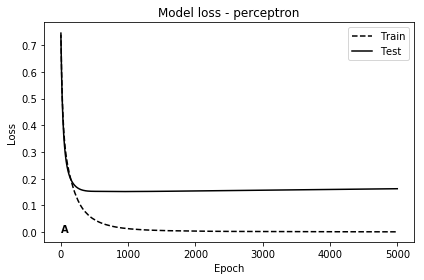

In [48]:
# Plot history for accuracy
plt.plot(history.history['loss'],'k--')
plt.plot(history.history['val_loss'],'k-')
plt.title('Model loss - perceptron')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.text(0, 0, 'A', fontweight='bold')
plt.tight_layout()
#plt.savefig('Kerasloss.pdf')
plt.show()

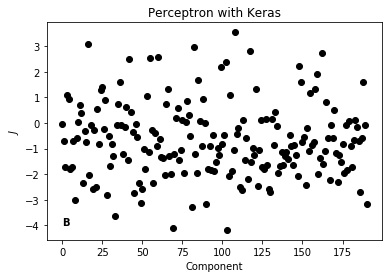

In [49]:
W=perceptron_k.layers[1].get_weights()
Jker=np.concatenate((W[0],W[1]), axis=None)
plt.plot(Jker,"ko")
plt.xlabel("Component")
plt.ylabel("$J$")
plt.title("Perceptron with Keras")
plt.text(0, -4, 'B', fontweight='bold')
plt.savefig('Jkeras.pdf')
plt.show()


In [33]:
zTrain = (perceptron_k.predict(XTrain)>0.5).astype(int).flatten()
zTest = (perceptron_k.predict(XTest)>0.5).astype(int).flatten()
# Check the result
print('Training errors: ',np.count_nonzero(zTrain!=yTrain)/len(yTrain))
print('Test errors: ',np.count_nonzero(zTest!=yTest)/len(yTest))
print('False positives: ',len(myset(yTest,0) & myset(zTest,1))/len(myset(yTest,0)))
print('False negatives: ',len(myset(yTest,1) & myset(zTest,0))/len(myset(yTest,1)))

Training errors:  0.0
Test errors:  0.029850746268656716
False positives:  0.0
False negatives:  0.6666666666666666


Conclusion:

$\bullet$ we are overfitting 

$\bullet$ we obtain similar performances as for the perceptron algorithm